In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

c:\users\dell\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\dell\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
df = pd.read_csv("E:/Local Disk/datasets/AirPassengers.csv")

In [13]:
df.head(3)

,Month,AirPAssengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
AirPAssengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [21]:
train , test = df[:-12], df[-12:]

In [23]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [39]:
n_input = 12
n_feature = 1

generator = TimeseriesGenerator(train, train, length = n_input, batch_size = 6)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_feature)))
model.add(Dropout(0.15))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator, epochs=180)


Epoch 1/180
20/20 [==============================] - 1s 42ms/step - loss: 0.0691
Epoch 2/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0175
Epoch 3/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0118
Epoch 4/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0113
Epoch 5/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0098
Epoch 6/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0095
Epoch 7/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0093
Epoch 8/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0088
Epoch 9/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0097
Epoch 10/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0121
Epoch 11/180
20/20 [==============================] - 0s 18ms/step - loss: 0.0089
Epoch 12/180
20/20 [==============================] - 0s 19ms/step - loss: 0.0083
Epoch 13/180
20/20 [====

20/20 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 98/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 99/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0054
Epoch 100/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0043
Epoch 101/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0029
Epoch 102/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0035
Epoch 103/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0024
Epoch 104/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 105/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 106/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0023
Epoch 107/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0032
Epoch 108/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 109/180
20/20 

In [43]:
pred_list = []

batch =train[-n_input:].reshape((1, n_input, n_feature))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, : ], [[pred_list[i]]], axis=1)

In [46]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([df, df_predict], axis=1)

In [49]:
df_test.tail(13)

,AirPAssengers,Predictions
Month,,
1959-12-01,405,NaN
1960-01-01,417,384.624451
1960-02-01,391,382.015469
1960-03-01,419,417.002124
1960-04-01,461,417.497880
1960-05-01,472,452.596513
1960-06-01,535,525.043069
1960-07-01,622,591.866431
1960-08-01,606,591.143355


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


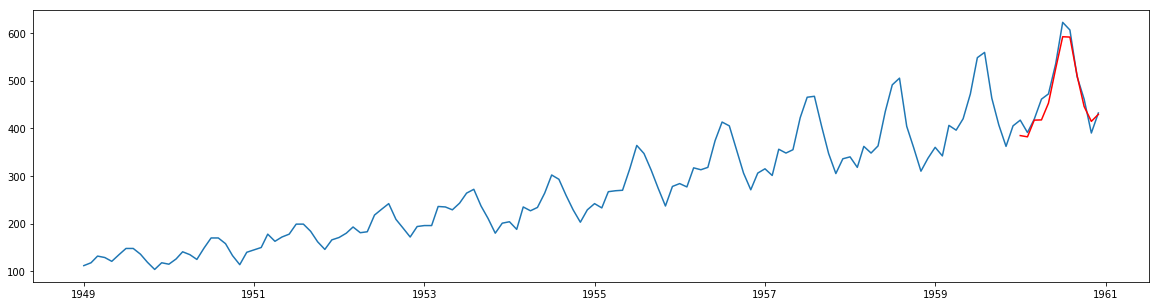

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPAssengers'])

plt.plot(df_test.index, df_test['Predictions'], color='r')

In [55]:
train = df

scaler.fit(train)
train = scaler.transform(train)

n_input = 12
n_feature = 1

generator = TimeseriesGenerator(train, train, length = n_input, batch_size = 6)

model.fit_generator(generator, epochs=180)

pred_list = []

pred_list = []

batch =train[-n_input:].reshape((1, n_input, n_feature))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, : ], [[pred_list[i]]], axis=1)

Epoch 1/180
22/22 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 2/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0017
Epoch 3/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 4/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 5/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0013
Epoch 6/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 7/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 8/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0021
Epoch 9/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 10/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 11/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 12/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 13/180
22/22 [=====

22/22 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 101/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 102/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0013
Epoch 103/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0012
Epoch 104/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0010
Epoch 105/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0013
Epoch 106/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0021
Epoch 107/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0013
Epoch 108/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0029
Epoch 109/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0013
Epoch 110/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 111/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0013
Epoch 112/180
22/2

In [59]:
from pandas.tseries.offsets import DateOffset

add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13)]
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)


In [62]:
future_dates

,AirPAssengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [63]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df, df_predict], axis=1)

In [65]:
df_proj.tail(14)

,AirPAssengers,Prediction
1960-11-01,390.0,NaN
1960-12-01,432.0,NaN
1961-01-01,NaN,434.168245
1961-02-01,NaN,421.576750
1961-03-01,NaN,448.610617
1961-04-01,NaN,487.701777
1961-05-01,NaN,525.031136
1961-06-01,NaN,605.384878
1961-07-01,NaN,697.331921
1961-08-01,NaN,674.692985


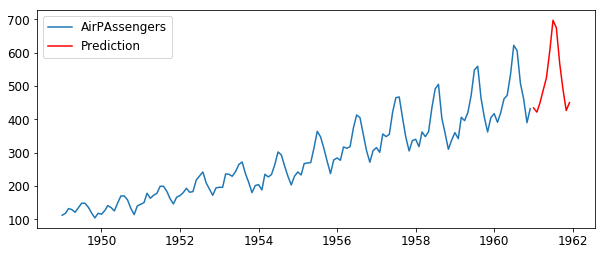

In [67]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['AirPAssengers'])
plt.plot(df_proj.index, df_proj['Prediction'],color='r')
plt.legend(loc='best', fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()